In [28]:
import sklearn
assert sklearn.__version__ >= "0.20"
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request
import matplotlib as mpl
import matplotlib.pyplot as plt


In [29]:
path='C:/Users/Hp/OneDrive/Desktop/DL coursework/Dubai_PG9/Datasets/Tabular/FOOD-DATA-GROUP.csv'
df=pd.read_csv(path)


In [30]:
df.head()


,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,cream cheese,51,5.0,2.9,1.3,0.200,0.8,0.500,0.9,0.0,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070
1,neufchatel cheese,215,19.4,10.9,4.9,0.800,3.1,2.700,7.8,0.0,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100
2,requeijao cremoso light catupiry,49,3.6,2.3,0.9,0.000,0.9,3.400,0.8,0.1,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400
3,ricotta cheese,30,2.0,1.3,0.5,0.002,1.5,0.091,1.5,0.0,...,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,cream cheese low fat,30,2.3,1.4,0.6,0.042,1.2,0.900,1.2,0.0,...,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007


In [31]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395 entries, 0 to 2394
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   food                  2395 non-null   object 
 1   Caloric Value         2395 non-null   int64  
 2   Fat                   2395 non-null   float64
 3   Saturated Fats        2395 non-null   float64
 4   Monounsaturated Fats  2395 non-null   float64
 5   Polyunsaturated Fats  2395 non-null   float64
 6   Carbohydrates         2395 non-null   float64
 7   Sugars                2395 non-null   float64
 8   Protein               2395 non-null   float64
 9   Dietary Fiber         2395 non-null   float64
 10  Cholesterol           2395 non-null   float64
 11  Sodium                2395 non-null   float64
 12  Water                 2395 non-null   float64
 13  Vitamin A             2395 non-null   float64
 14  Vitamin B1            2395 non-null   float64
 15  Vitamin B11          

In [32]:
df = df.drop("food",axis=1)
features = df.drop("Caloric Value",axis=1).columns.tolist()
target = "Caloric Value"
#Drop target as if is not needed in clustering


In [33]:
from sklearn.preprocessing import PowerTransformer

# Initialize the PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True)

# Transform the data
df_transformed = pt.fit_transform(df)

# Convert back to DataFrame
df = pd.DataFrame(df_transformed, columns=df.columns)

In [34]:
# Column added for feature extraction
df['Protein+Carbohydrates+Fat'] = df['Protein']+df['Carbohydrates']+df['Fat']
df['Total Fats'] = df['Polyunsaturated Fats'] + df['Saturated Fats'] + df['Monounsaturated Fats']
new_features = ['Protein+Carbohydrates+Fat', 'Total Fats']

In [35]:
features = ['Nutrition Density', 'Zinc', 'Vitamin B3', 'Vitamin B1', 'Vitamin B6', 'Calcium', 'Cholesterol', 'Sodium', 'Water', 'Dietary Fiber', 'Sugars', 'Vitamin C', 'Selenium' ]
X = df[features + new_features]
y = df[target]
feature_names = np.array(X.columns)


Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively.This hierarchy of clusters is represented as a tree (or dendogram). The root of the tree is the unique cluster that gathers all the samples,the leaves being the clusters with only one sample.

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from sklearn.preprocessing import StandardScaler
#Load the dataset
file_path='C:/Users/Hp/OneDrive/Desktop/DL coursework/Dubai_PG9/Datasets/Tabular/FOOD-DATA-GROUP.csv'
df=pd.read_csv(file_path)


In [37]:
#Select numerical features and normalize them
scaler = StandardScaler()
scaled_X=scaler.fit_transform(X)



In [ ]:
#Generate linkage matrix for dendrogram
linked = linkage(scaled_X,method='ward')

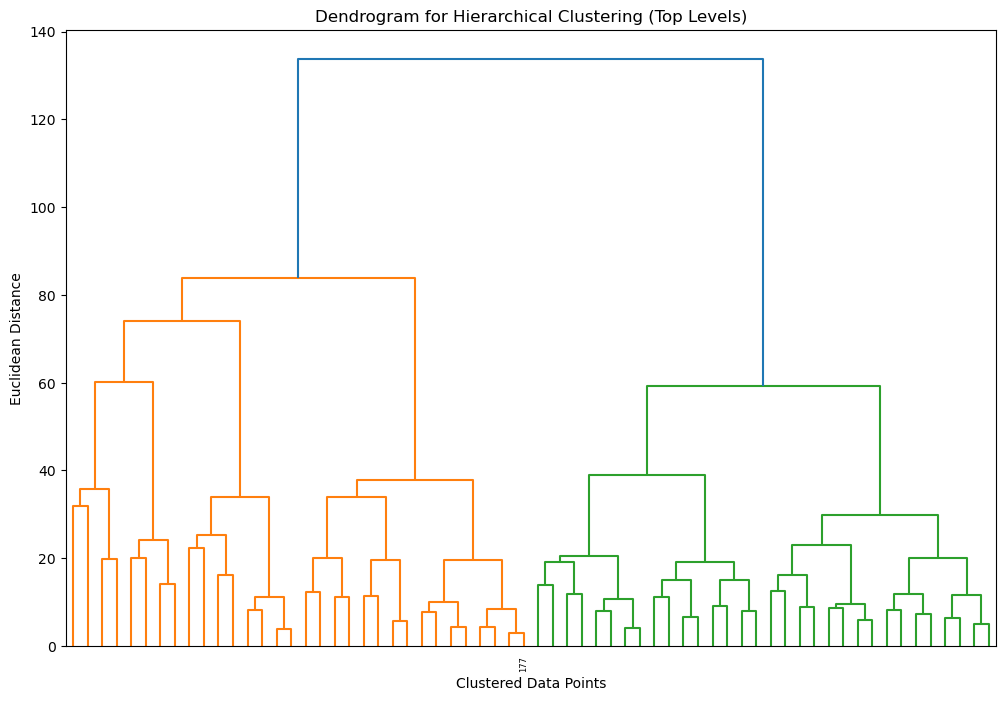

Average Caloric Value per Cluster:
Cluster
1    475.812147
2    142.832021
3     93.167897
4     82.066890
5    149.675269
Name: Caloric Value, dtype: float64

Items in Cluster 1 (highest average caloric value):
                                            food  Caloric Value
17                                gjetost cheese           1058
24                              roquefort cheese            314
46                                chicken spread             88
56                                   corn tamale            309
57          baked potato with cheese sauce bacon            451
...                                          ...            ...
2366                        taco salad taco bell            906
2369                       potato salad with egg            393
2371  caesar salad with crispy chicken mcdonalds            349
2373             vegetable salad with cheese egg             68
2376                 vegetable salad with shrimp             71

[708 rows x 2 colum

In [39]:
#Plot dendrogram to visualize the clustering hierarchy
plt.figure(figsize=(12, 8))
dendrogram(linked,orientation='top',distance_sort='descending',show_leaf_counts=False, truncate_mode='level',p=5)
plt.title("Dendrogram for Hierarchical Clustering (Top Levels)")
plt.xlabel("Clustered Data Points")
plt.ylabel("Euclidean Distance")
plt.show()
# Cut the dendrogram to form a specified number of clusters (for example, 5 clusters)
num_clusters = 5
clusters = fcluster(linked, num_clusters, criterion='maxclust')
df['Cluster'] = clusters
# Calculate the average caloric value for each cluster
cluster_caloric_means = df.groupby('Cluster')['Caloric Value'].mean()
print("Average Caloric Value per Cluster:")
print(cluster_caloric_means)
# Optionally, display items in the cluster with the highest caloric values
highest_caloric_cluster = cluster_caloric_means.idxmax()
print(f"\nItems in Cluster {highest_caloric_cluster} (highest average caloric value):")
print(df[df['Cluster'] == highest_caloric_cluster][['food', 'Caloric Value']])

The dendogram above represents the hierarchial clustering of the data points based on the Euclidean distance.
It shows a tree like structure where each leaf represent individual data point and branches represent clusters formed by merging individual items or clusters.
The vertical lines indicate merging of clusters and height of vertical lines represent the Euclidean distance at which clusters are merged.


In the above dendogram, the largest distance at which clusters are merged (about 130 on the vertical axis) separates the entire dataset into two main clusters represented by orange and green colour.The orange has more subclusters than green suggesting it may contain more diverse or numerous food items